# Example 1: Loading and visualizing development-indicador data

This example shows how to use Python to load the data and visualize it in different ways. It also demonstrates how to load the network and plot a colored graph that illustrates the structuere of synergies and trade-offs between the SDGs.

## Import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

## Load and show development indicators

In [2]:
data = pd.read_csv('final_sample_normalized.csv', sep='\t', header=0, low_memory=False, encoding='utf-16')
data # print data table

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,reverse,seriesNameSpanish,sourceName,sourceNameSpanish,sourceProduct,sourceProductSpanish,sourceLink,goalOfficial,goalColor,goalColorOfficial
0,0.884000,0.877000,0.870000,0.870000,0.870000,0.872000,0.874000,0.868000,0.862000,0.875000,...,1.0,"brecha de pobreza a 5.5 dólares diarios (PPA, ...",World Bank,Banco Mundial,poverty and equity database,datos de pobreza y desigualdad,https://datacatalog.worldbank.org/dataset/pove...,1,#E5243B,#E5243B
1,0.667000,0.659500,0.652000,0.647500,0.643000,0.638500,0.634000,0.637500,0.641000,0.648000,...,1.0,población en situación de pobreza moderada,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
2,0.890000,0.888500,0.887000,0.894500,0.902000,0.903500,0.905000,0.914500,0.924000,0.925000,...,1.0,población en situación de pobreza extrema,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
3,0.677000,0.698000,0.719000,0.716500,0.714000,0.725500,0.737000,0.734500,0.732000,0.719500,...,1.0,población vulnerable por carencias sociales,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
4,0.953000,0.947000,0.941000,0.939500,0.938000,0.933500,0.929000,0.929500,0.930000,0.930500,...,1.0,población vulnerable por ingresos,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
5,0.616000,0.662000,0.708000,0.746500,0.785000,0.801500,0.818000,0.831500,0.845000,0.841500,...,1.0,carencia por acceso a los servicios de salud,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
6,0.350000,0.371500,0.393000,0.390500,0.388000,0.401500,0.415000,0.428500,0.442000,0.434500,...,1.0,carencia por acceso a la seguridad social,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
7,0.823000,0.835500,0.848000,0.856000,0.864000,0.870500,0.877000,0.878500,0.880000,0.884500,...,1.0,carencia por calidad y espacios de la vivienda,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
8,0.771000,0.771000,0.771000,0.779500,0.788000,0.788000,0.788000,0.797500,0.807000,0.804500,...,1.0,carencia por acceso a los servicios básicos en...,CONEVAL,CONEVAL,measurement of poverty,medición de la pobreza,https://www.coneval.org.mx/Medicion/Paginas/Po...,1,#E5243B,#E5243B
9,0.045370,0.048854,0.052338,0.055823,0.059307,0.064529,0.069752,0.071197,0.072642,0.073754,...,NaN,especies de plantas para las que se tienen suf...,UN,ONU,SDG indicators,indicadores de los ODS,https://unstats.un.org/sdgs/indicators/database/,2,#DDA63A,#DDA63A


In [3]:
data.describe() # summary statistics

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,instrumental,reverse,goalOfficial
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,37.0,141.000000
mean,0.508485,0.503862,0.502581,0.498059,0.512712,0.524109,0.524929,0.518528,0.524042,0.532552,0.532391,0.64539,1.0,9.007092
std,0.303311,0.304963,0.303187,0.304411,0.300319,0.297976,0.297144,0.296148,0.300185,0.303044,0.305855,0.48010,0.0,4.642192
min,0.000000,0.000000,0.000000,0.000000,0.000136,0.000132,0.000090,0.000121,0.000122,0.000126,0.000122,0.00000,1.0,1.000000
25%,0.291796,0.268011,0.278976,0.256850,0.290469,0.319672,0.311002,0.288457,0.288457,0.305447,0.283659,0.00000,1.0,7.000000
50%,0.505878,0.497249,0.479918,0.480924,0.510756,0.532908,0.541889,0.525204,0.528109,0.546877,0.545448,1.00000,1.0,9.000000
75%,0.737359,0.741523,0.729730,0.743476,0.741099,0.736842,0.736842,0.736842,0.738658,0.741214,0.747604,1.00000,1.0,12.000000
max,0.999656,0.999620,0.999510,0.999493,0.999603,0.999674,1.000000,0.999701,0.999758,0.999815,1.000000,1.00000,1.0,17.000000


## Plot initial and final values of each indicator

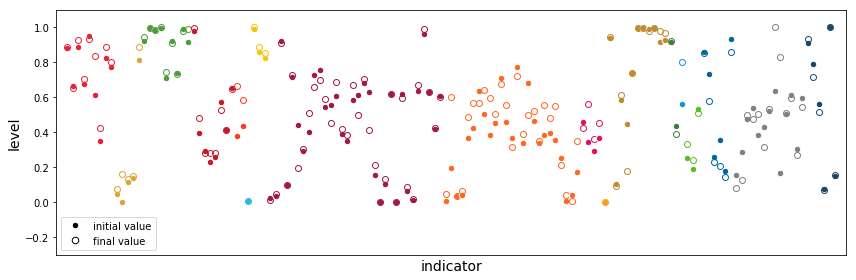

In [4]:
colors_sdg = dict(zip(data.goal, data.goalColor)) # a dictionary mapping the colors of the SDGs for the plot

plt.figure(figsize=(12,4))
plt.plot(-10, -10, '.', mec='white', mfc='black', markersize=13)
plt.plot(-10, -10, '.', mec='black', mfc='none', markersize=13)
for index, row in data.iterrows():
    plt.plot(index, row['2006'], '.', mec='white', mfc=colors_sdg[row['goal']], markersize=13)
    plt.plot(index, row['2016'], '.', mec=colors_sdg[row['goal']], mfc='none', markersize=12)
plt.xticks([])
plt.xlabel('indicator', fontsize=14)
plt.ylabel('level', fontsize=14)
plt.xlim(-2, len(data)+1)
plt.ylim(-.3, 1.1)
plt.legend(['initial value', 'final value'], loc=3)
plt.tight_layout()
plt.show()

## Load growth factors and plot them

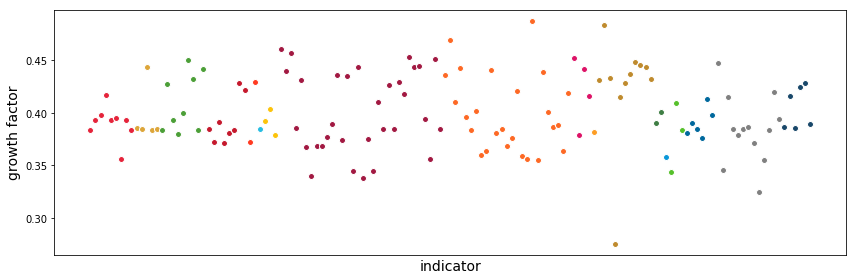

In [5]:
alphas = np.loadtxt('alphas.csv') # load alphas in a numpy array
goals = data.goal.values # make a list of the SDG of each indicator (for the colors)

plt.figure(figsize=(12,4))
for i, alpha in enumerate(alphas):
    plt.plot(i, alpha, '.', mfc=colors_sdg[goals[i]], mec='white', markersize=12)
plt.xticks([])
plt.xlabel('indicator', fontsize=14)
plt.ylabel('growth factor', fontsize=14)
plt.tight_layout()
plt.show()

## Load network data and plot its adjacency matrix

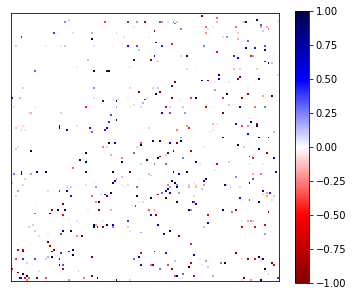

In [6]:
A = np.loadtxt('network.csv') # load network in a 2D numpy array
A[A==0] = np.nan # remove zeros for visual clarity

plt.figure(figsize=(6,5))
plt.imshow(A, origin=0, cmap='seismic_r', vmin=-1, vmax=1)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

## Make a network plot with the top 100 synergies (positive links)

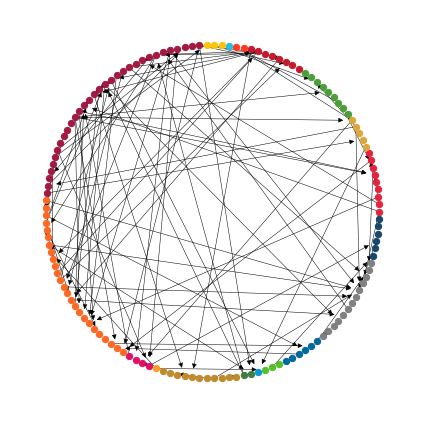

In [7]:
# make a copy of the adjancency matrix and filter the positive edges
S = np.array(A)
S[np.isnan(S)] = 0
S[S<0] = 0

# create a graph object
G = nx.DiGraph(S)
pos = nx.circular_layout(G)
sedges = sorted([(v[2]['weight'], v[0], v[1]) for v in G.edges(data=True)])[::-1]

# plot the network
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
nx.draw_networkx_edges(G, pos, edgelist=[(e[1], e[2]) for e in sedges[0:100]], edge_color='black', width=.5)
for i in range(len(pos)):
    nx.draw_networkx_nodes(G, pos, nodelist=[i], node_color=colors_sdg[goals[i]], node_size=40, edge_color='white')
plt.xticks([])
plt.yticks([])
ax.axis('off')
plt.tight_layout()
plt.show()

## Make a network plot with the top 100 trade-offs (negative links)

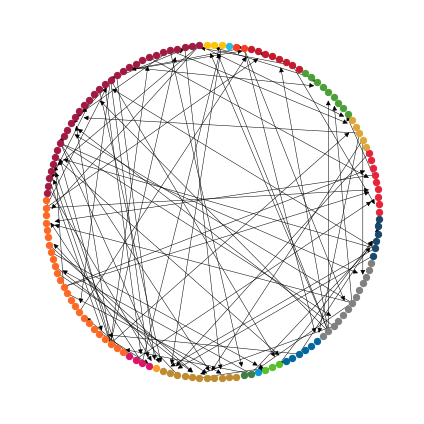

In [8]:
# make a copy of the adjancency matrix and filter the negative edges
S = np.array(A)
S[np.isnan(S)] = 0
S[S>0] = 0

# create a graph object
G = nx.DiGraph(S)
pos = nx.circular_layout(G)
sedges = sorted([(v[2]['weight'], v[0], v[1]) for v in G.edges(data=True)])[::-1]

# plot the network
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
nx.draw_networkx_edges(G, pos, edgelist=[(e[1], e[2]) for e in sedges[0:100]], edge_color='black', width=.5)
for i in range(len(pos)):
    nx.draw_networkx_nodes(G, pos, nodelist=[i], node_color=colors_sdg[goals[i]], node_size=40, edge_color='white')
plt.xticks([])
plt.yticks([])
ax.axis('off')
plt.tight_layout()
plt.show()